# K-means clustering from scratch

This notebook shows how to build k-means clustering algorithm from scratch using Python. I'm using a loan dataset to group applicants based on their income and loan amount.

**Dataset**: clustering.csv (loan applications data)  
**What it does**: Groups loan applicants into 3 clusters to see different customer types

## Import Required Libraries

We'll import the necessary Python libraries for data manipulation, numerical computations, visualization, and random number generation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd

## Load and Explore the Dataset

Let's load the clustering dataset and examine the first few rows to understand the structure of our data.

In [3]:
df = pd.read_csv('/content/clustering.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


## Feature Selection and Initial Data Visualization

We'll select the two most relevant features for clustering: **LoanAmount** and **ApplicantIncome**. Let's create a scatter plot to visualize the distribution of our data points.

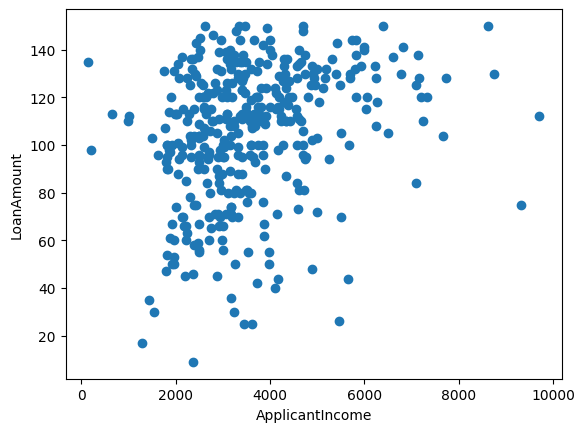

In [6]:
X = df[['LoanAmount','ApplicantIncome']]
plt.scatter(X['ApplicantIncome'],X['LoanAmount'])
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

## Inspect Selected Features

Let's examine our selected feature matrix to understand the data we'll be clustering.

In [11]:
X

,LoanAmount,ApplicantIncome
0,128.0,4583
1,66.0,3000
2,120.0,2583
3,141.0,6000
4,95.0,2333
...,...,...
376,128.0,5703
377,108.0,3232
378,71.0,2900
379,40.0,4106


## Initialize Centroids

For K-means clustering, we need to:
1. Define the number of clusters (K=3)
2. Randomly select initial centroids from our dataset
3. Visualize the data points along with the initial centroids

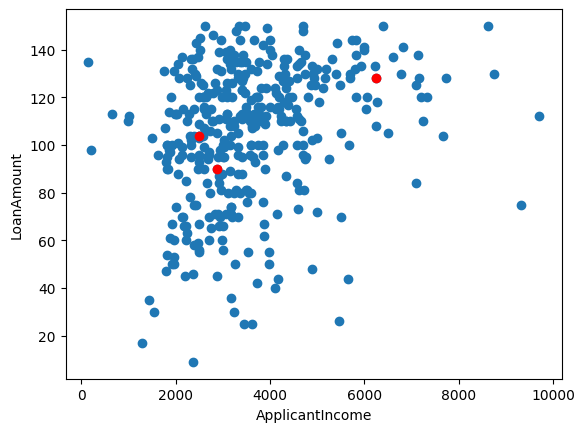

In [10]:
num_clusters = 3
centroids = X.sample(n=num_clusters)
plt.scatter(X['ApplicantIncome'],X['LoanAmount'])
plt.scatter(centroids['ApplicantIncome'],centroids['LoanAmount'],color='red')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

## K-means Algorithm Implementation

Now we'll implement the core K-means algorithm from scratch:

**Algorithm Steps:**
1. **Distance Calculation**: Calculate Euclidean distance from each point to all centroids
2. **Cluster Assignment**: Assign each point to the nearest centroid
3. **Centroid Update**: Calculate new centroids as the mean of assigned points
4. **Convergence Check**: Repeat until centroids stop moving significantly

The algorithm continues until convergence (when centroids no longer change position).

In [12]:


difference = 1
first_iteration = True

while difference != 0:
    # to avoid modifying original data unintentionally
    X_copy = X.copy()

    centroid_index = 1
    for _, centroid_row in centroids.iterrows():
        distances = []
        for _, point in X_copy.iterrows():
            income_diff = (centroid_row["ApplicantIncome"] - point["ApplicantIncome"]) ** 2
            loan_diff = (centroid_row["LoanAmount"] - point["LoanAmount"]) ** 2
            euclidean_distance = np.sqrt(income_diff + loan_diff)
            distances.append(euclidean_distance)
        # add distance column for this centroid
        X_copy[centroid_index] = distances
        centroid_index += 1

    # assign each point to the nearest centroid
    cluster_assignments = []
    for _, row in X_copy.iterrows():
        min_distance = row[1]
        cluster_id = 1
        for k in range(2, num_clusters + 1):
            if row[k] < min_distance:
                min_distance = row[k]
                cluster_id = k
        cluster_assignments.append(cluster_id)

    # add cluster assignment to X_copy
    X_copy["Cluster"] = cluster_assignments

    # calculate new centroids by taking mean of each cluster
    new_centroids = X_copy.groupby("Cluster")[["LoanAmount", "ApplicantIncome"]].mean()

    # calculate change in centroids to check for convergence
    if first_iteration:
        difference = 1
        first_iteration = False
    else:
        loan_change = (new_centroids["LoanAmount"] - centroids["LoanAmount"]).abs().sum()
        income_change = (new_centroids["ApplicantIncome"] - centroids["ApplicantIncome"]).abs().sum()
        difference = loan_change + income_change
        print(f"Centroid change: {difference}")

    #update centroids
    centroids = new_centroids

# after loop ends assign final cluster labels to original X
X.loc[:, "Cluster"] = cluster_assignments


Centroid change: 221.56113195886792
Centroid change: 212.30400931095977
Centroid change: 331.0821330543655
Centroid change: 217.7532044140301
Centroid change: 158.71377862757606
Centroid change: 217.89089187942537
Centroid change: 61.975176545793204
Centroid change: 80.93265730200577
Centroid change: 100.76640032522515
Centroid change: 27.38200063816943
Centroid change: 18.275467552797807
Centroid change: 9.969890935748964
Centroid change: 18.345487493007468
Centroid change: 46.79469082247495
Centroid change: 0.0


<ipython-input-12-238029937>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, "Cluster"] = cluster_assignments


## Visualize Final Clusters

Let's create a color-coded scatter plot to visualize our final clustering results:
- Each cluster will be displayed in a different color
- Centroids will be marked in red
- This helps us understand how the algorithm has grouped similar applicants

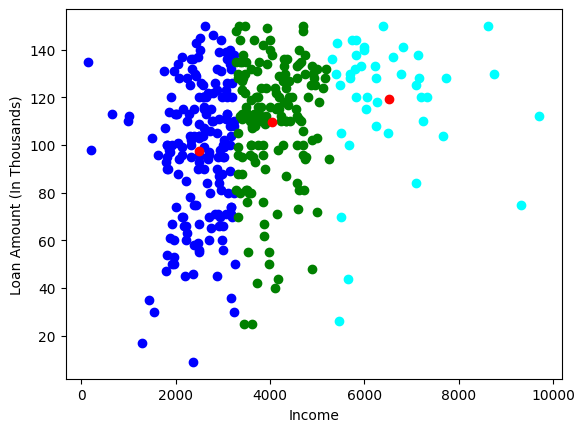

In [13]:
color=['blue','green','cyan']
for k in range(num_clusters):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(centroids["ApplicantIncome"],centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

## Analyze Final Centroids

Let's examine the final centroid positions to understand the characteristics of each cluster.

In [14]:
centroids

,LoanAmount,ApplicantIncome
Cluster,,
1,97.472527,2497.972527
2,109.756410,4033.596154
3,119.488372,6512.767442


## Examine Clustered Data

Let's look at our original data with the added cluster assignments to see how each applicant has been categorized.

In [15]:
X

,LoanAmount,ApplicantIncome,Cluster
0,128.0,4583,2
1,66.0,3000,1
2,120.0,2583,1
3,141.0,6000,3
4,95.0,2333,1
...,...,...,...
376,128.0,5703,3
377,108.0,3232,1
378,71.0,2900,1
379,40.0,4106,2


## Analyze Cluster Distribution

Let's examine the cluster assignments to understand how many applicants belong to each cluster.

In [30]:
X['Cluster']

,Cluster
0,2
1,1
2,1
3,3
4,1
...,...
376,3
377,1
378,1
379,2


## Prediction Function and Testing

Now let's create a prediction function that can classify new loan applicants based on our trained model.

**The prediction function will:**
1. Calculate the distance from a new applicant to each centroid
2. Assign the applicant to the cluster with the nearest centroid
3. Return both the predicted cluster and the distance to the nearest centroid

We'll test this with three different scenarios:
- **High Income, High Loan** applicant
- **Low Income, Low Loan** applicant  
- **Medium Income, Medium Loan** applicant

Final Centroids:
         LoanAmount  ApplicantIncome
Cluster                             
1         97.472527      2497.972527
2        109.756410      4033.596154
3        119.488372      6512.767442

New applicant: Income=8000, Loan=200
Predicted Cluster: 3
Distance to nearest centroid: 1489.41

New applicant: Income=2000, Loan=50
Predicted Cluster: 1
Distance to nearest centroid: 500.23

New applicant: Income=5000, Loan=120
Predicted Cluster: 2
Distance to nearest centroid: 966.46


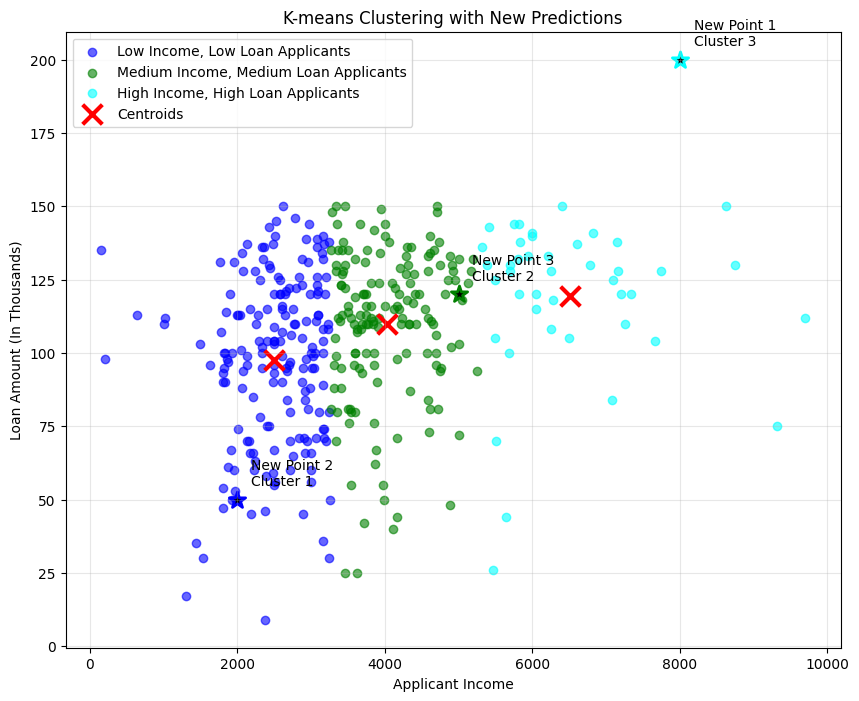

In [31]:
#prediction
def predict_cluster(new_income, new_loan_amount, centroids):
    min_distance = float('inf')
    predicted_cluster = 1

    for cluster_id, centroid in centroids.iterrows():
        # Calculate Euclidean distance to this centroid
        income_diff = (centroid["ApplicantIncome"] - new_income) ** 2
        loan_diff = (centroid["LoanAmount"] - new_loan_amount) ** 2
        distance = np.sqrt(income_diff + loan_diff)

        if distance < min_distance:
            min_distance = distance
            predicted_cluster = cluster_id

    return predicted_cluster, min_distance

#examples
print("Final Centroids:")
print(centroids)
print("\n" + "="*50) #prints ===============================

# first example =high income, high loan
new_point_1 = predict_cluster(8000, 200, centroids)
print(f"New applicant: Income=8000, Loan=200")
print(f"Predicted Cluster: {new_point_1[0]}")
print(f"Distance to nearest centroid: {new_point_1[1]:.2f}")

# second example =low income, low loan
new_point_2 = predict_cluster(2000, 50, centroids)
print(f"\nNew applicant: Income=2000, Loan=50")
print(f"Predicted Cluster: {new_point_2[0]}")
print(f"Distance to nearest centroid: {new_point_2[1]:.2f}")

# third example=medium income, medium loan
new_point_3 = predict_cluster(5000, 120, centroids)
print(f"\nNew applicant: Income=5000, Loan=120")
print(f"Predicted Cluster: {new_point_3[0]}")
print(f"Distance to nearest centroid: {new_point_3[1]:.2f}")

# visualize predtictons
plt.figure(figsize=(10, 8))

# plot original clustered data

cluster_names = {
    1: "Low Income, Low Loan Applicants",
    2: "Medium Income, Medium Loan Applicants",
    3: "High Income, High Loan Applicants"
}

for k in range(num_clusters):
    data = X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"], data["LoanAmount"], c=color[k], alpha=0.6, label=cluster_names[k+1])

# plot centroids
plt.scatter(centroids["ApplicantIncome"], centroids["LoanAmount"], c='red', s=200, marker='x', linewidths=3, label='Centroids')

# plot new predictions
new_points = [(8000, 200), (2000, 50), (5000, 120)]
new_predictions = [predict_cluster(income, loan, centroids)[0] for income, loan in new_points]


for i, (income, loan) in enumerate(new_points):
    cluster = new_predictions[i]
    plt.scatter(income, loan, c='black', s=150, marker='*', edgecolors=color[cluster-1], linewidth=2)
    plt.annotate(f'New Point {i+1}\nCluster {cluster}', (income, loan), xytext=(10, 10),
                textcoords='offset points', fontsize=10, ha='left')

plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.title('K-means Clustering with New Predictions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Examine Prediction Results

Let's examine the detailed prediction results for our first test case (High Income, High Loan applicant).

In [25]:
new_point_1

(3, np.float64(1489.4102202611937))